# Customer Segmentation with RFM (Recency, Frequency, Monetary) Analysis

Reference
* RFM Analysis Tutorial In Pandas: Simple Customer Segmentation Analysis, Jie Jenn
* What are RFM Scores and How to Calculate Them, Connectif.ai

In [ ]:
# Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


## Load Data

In [ ]:
# Read CSV file

sales_data = pd.read_csv("/content/sales_data.csv",parse_dates=['OrderDate', 'ShipDate', 'DeliveryDate'])

# Make a copy of sales_data
custdf = sales_data.copy()



In [ ]:
# Convert _CustomerID to string
custdf['_CustomerID'] = custdf['_CustomerID'].astype(str)

# Calculate Revenue
custdf['Revenue'] = (custdf['Unit Price'] - (custdf['Unit Price'] * custdf['Discount Applied']) - custdf['Unit Cost']) * custdf['Order Quantity']

# Display first 5 rows
custdf.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,4073.4325
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,886.4100
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,905.5050
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,5486.7640
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,1312.1280


In [ ]:
# Number of rows and columns

custdf.shape

(7991, 17)

In [ ]:
# Column names, data types, and non-null value count

custdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   object        
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   object        
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

In [ ]:
# Descriptive Statistics

custdf.describe()

,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue
count,7991,7991,7991,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,2019-09-15 11:01:09.828557312,2019-09-30 15:04:26.249530624,2019-10-06 03:10:06.832686592,14.384307,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054,2668.668146
min,2018-05-31 00:00:00,2018-06-02 00:00:00,2018-06-07 00:00:00,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000,-12167.200000
25%,2019-01-16 12:00:00,2019-01-31 00:00:00,2019-02-06 00:00:00,8.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500,498.078000
50%,2019-09-15 00:00:00,2019-09-30 00:00:00,2019-10-05 00:00:00,14.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000,1544.283000
75%,2020-05-12 00:00:00,2020-05-28 00:00:00,2020-06-01 00:00:00,21.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500,3522.860000
max,2020-12-30 00:00:00,2021-01-24 00:00:00,2021-02-02 00:00:00,28.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000,26384.600000
std,NaN,NaN,NaN,7.986086,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043,3416.705725


## Create Dataframe for RFM Analysis

In [ ]:
# Create a dataframe with the columns needed for the analysis

columns = ['OrderNumber', '_CustomerID', 'OrderDate', 'Revenue']

df_dataset = custdf[columns]



In [ ]:
# Identify today_date by looking at the max OrderDate

today_date = df_dataset['OrderDate'].max() + pd.Timedelta(days=2)
today_date



Timestamp('2021-01-01 00:00:00')

## Calculate Recency, Frequency, Monetary

- Recency: Time since last order or purchase
- Frequency: Total number of transactions
- Monetary: Total transaction value

In [ ]:
# Calculate Recency, Frequency, and Monetary

custrfm = df_dataset.groupby('_CustomerID').agg({
    'OrderDate': lambda v: (today_date - v.max()).days,
    'OrderNumber': 'count',
    'Revenue': 'sum'
})

# Rename columns
custrfm.rename(
    columns = {
        'OrderDate': 'recency',
        'OrderNumber': 'frequency',
        'Revenue': 'monetary'
    },
    inplace=True
)

# Display customer rfm dataset
custrfm.head()

,recency,frequency,monetary
_CustomerID,,,
1,9,152,335933.6115
10,15,158,435122.1870
11,6,178,487614.2415
12,3,210,616719.2550
13,4,171,441003.2795


In [ ]:
# Assign quantile to each category

r = pd.qcut(custrfm['recency'], q=5, labels=['5','4','3','2','1'])
f = pd.qcut(custrfm['frequency'], q=5, labels=['1','2','3','4','5'])
m = pd.qcut(custrfm['monetary'], q=5, labels=['1','2','3','4','5'])

In [ ]:
# Add r, f, m to custrfm dataframe

rfm = custrfm.assign(R=r.values, F=f.values, M=m.values)
rfm.head()

,recency,frequency,monetary,R,F,M
_CustomerID,,,,,,
1,9,152,335933.6115,2,2,1
10,15,158,435122.1870,1,3,3
11,6,178,487614.2415,3,5,5
12,3,210,616719.2550,5,5,5
13,4,171,441003.2795,4,4,3


## Feature Engineering

In [ ]:
# Create grouping to concatenate rankings

rfm['rfm_group'] = (rfm.R.astype(str)+ rfm.F.astype(str) + rfm.M.astype(str)).astype(int)
rfm.head()

,recency,frequency,monetary,R,F,M,rfm_group
_CustomerID,,,,,,,
1,9,152,335933.6115,2,2,1,221
10,15,158,435122.1870,1,3,3,133
11,6,178,487614.2415,3,5,5,355
12,3,210,616719.2550,5,5,5,555
13,4,171,441003.2795,4,4,3,443


In [ ]:
# Columns, data type, non-null values

rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   recency    50 non-null     int64   
 1   frequency  50 non-null     int64   
 2   monetary   50 non-null     float64 
 3   R          50 non-null     category
 4   F          50 non-null     category
 5   M          50 non-null     category
 6   rfm_group  50 non-null     int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 4.8+ KB


In [ ]:
# Move index to a column

rfm.reset_index(inplace=True)
rfm.head()

,_CustomerID,recency,frequency,monetary,R,F,M,rfm_group
0,1,9,152,335933.6115,2,2,1,221
1,10,15,158,435122.1870,1,3,3,133
2,11,6,178,487614.2415,3,5,5,355
3,12,3,210,616719.2550,5,5,5,555
4,13,4,171,441003.2795,4,4,3,443


In [ ]:
# Assign Customer Segments

rfm.loc[rfm['rfm_group'].isin ([555, 554, 544, 545, 454, 455, 445]), 'Customer_Segment'] = 'Champions'
rfm.loc[rfm['rfm_group'].isin ([543, 444, 435, 355, 354, 345, 344, 335]), 'Customer_Segment'] = 'Loyal Customer'
rfm.loc[rfm['rfm_group'].isin ([553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]), 'Customer_Segment'] = 'Potential Loyalist'
rfm.loc[rfm['rfm_group'].isin ([512, 511, 422, 421, 412, 411, 311]), 'Customer_Segment'] = 'New Customer'
rfm.loc[rfm['rfm_group'].isin ([525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]), 'Customer_Segment'] = 'Promising'
rfm.loc[rfm['rfm_group'].isin ([535, 534, 443, 434, 343, 334, 325, 324]), 'Customer_Segment'] = 'Need Attention'
rfm.loc[rfm['rfm_group'].isin ([155, 154, 144, 214,215,115, 114, 113]), 'Customer_Segment'] = 'Cannot Lose'
rfm.loc[rfm['rfm_group'].isin ([331, 321, 312, 221, 213]), 'Customer_Segment'] = 'About Sleep'
rfm.loc[rfm['rfm_group'].isin ([255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]), 'Customer_Segment'] = 'At Risk'
rfm.loc[rfm['rfm_group'].isin ([332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]), 'Customer_Segment'] = 'At Risk'
rfm.loc[rfm['rfm_group'].isin ([111, 112, 121, 131, 141, 151]), 'Customer_Segment'] = 'Lost'


In [ ]:
rfm.head()

,_CustomerID,recency,frequency,monetary,R,F,M,rfm_group,Customer_Segment
0,1,9,152,335933.6115,2,2,1,221,About Sleep
1,10,15,158,435122.1870,1,3,3,133,At Risk
2,11,6,178,487614.2415,3,5,5,355,Loyal Customer
3,12,3,210,616719.2550,5,5,5,555,Champions
4,13,4,171,441003.2795,4,4,3,443,Need Attention


## Exploratory Data Analysis

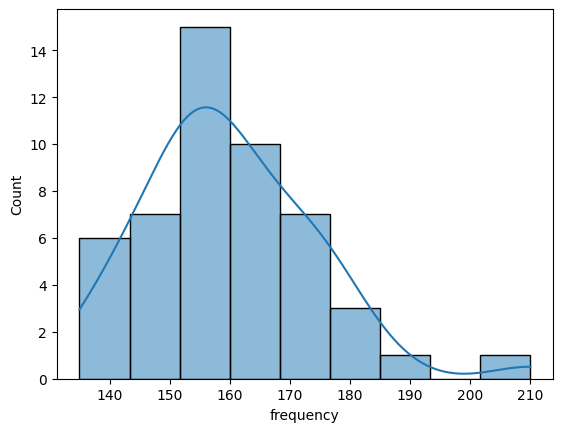

In [ ]:
# plot "Purchase Frequency" using a histogram

sns.histplot(data=rfm, x="frequency", kde=True)
plt.show()

<Axes: xlabel='monetary', ylabel='Count'>

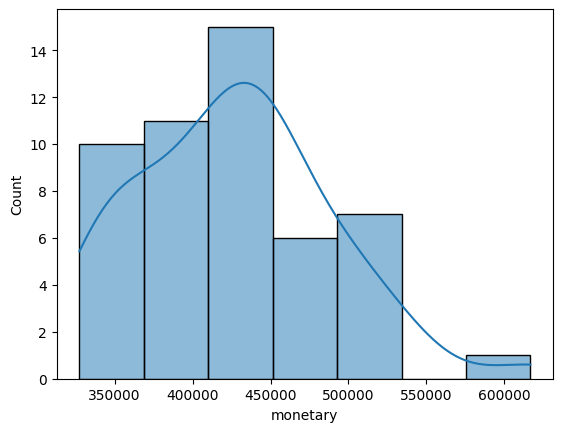

In [ ]:
# Plot "Revenue" using a histogram

sns.histplot(data=rfm, x="monetary", kde=True)

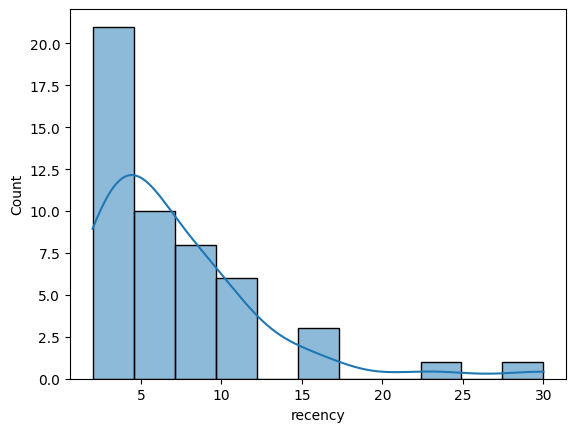

In [ ]:
# Plot Days Since Last Purchase using a histogram

sns.histplot(data=rfm, x="recency", kde=True)
#plt.xticks(rotation=45, ha='right')
plt.show()

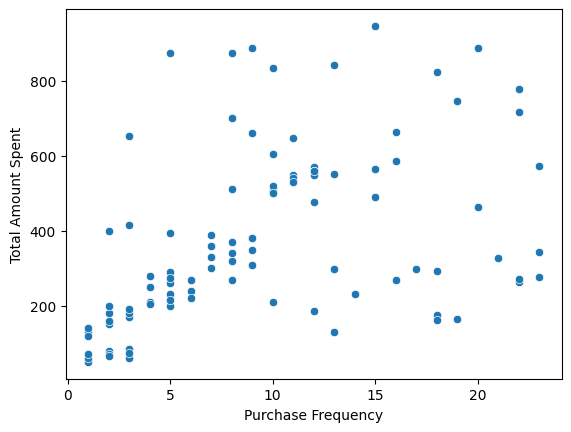

In [ ]:
# Plot "Frequency (Purchase Frequency)" vs "Monetary (Revenue)"

sns.scatterplot(data=rfm, x = 'frequency', y = 'monetary')
plt.show()

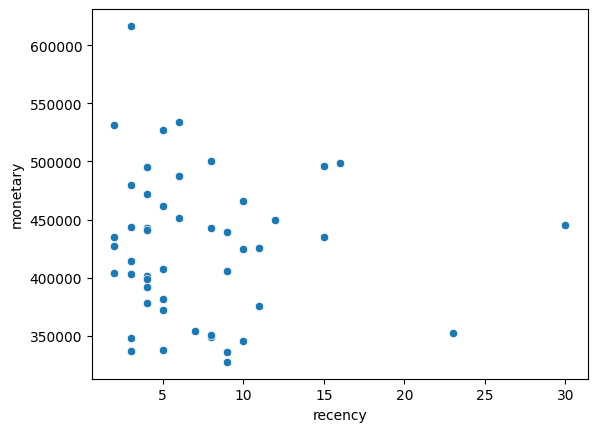

In [ ]:
# Plot Recency (Days Since Last Purchase) vs Monetary (Revenue)

sns.scatterplot(data=rfm, x = 'recency', y = 'monetary')
#plt.xticks(rotation=45, ha='right')
plt.show()

## Customer Segment Analysis

In [ ]:
# Customer Segment By Number of Customers

rfm.groupby("Customer_Segment")['_CustomerID'].count()

,_CustomerID
Customer_Segment,
About Sleep,2
At Risk,17
Cannot Lose,2
Champions,5
Lost,1
Loyal Customer,5
Need Attention,2
New Customer,6
Potential Loyalist,6


In [ ]:
import plotly.express as px

fig = px.scatter(rfm, y= "frequency", x= "monetary", color="Customer_Segment", color_discrete_sequence=px.colors.qualitative.Set1,
               title="Frequency vs Monetary", width=600, height=400,labels={"frequency": "Purchase Frequency",
               "monetary": "Revenue"}
                 )
fig.update_layout(plot_bgcolor="white")
fig.show()


In [ ]:
fig = px.scatter(rfm, y= "frequency", x= "recency", color="Customer_Segment", color_discrete_sequence=px.colors.qualitative.Set1,
               title="Recency vs Frequency", width=600, height=400,labels={"frequency": "Purchase Frequency",
               "recency": "Days Since Last Purchase"}
                 )
fig.update_layout(plot_bgcolor="white")
fig.show()

In [ ]:
fig = px.scatter(rfm, y= "monetary", x= "recency", color="Customer_Segment", color_discrete_sequence=px.colors.qualitative.Set1,
               title="Recency vs Monetary", width=600, height=400,labels={"monetary": "Revenue",
               "recency": "Days Since Last Purchase"}
                 )
fig.update_layout(plot_bgcolor="white")
fig.show()

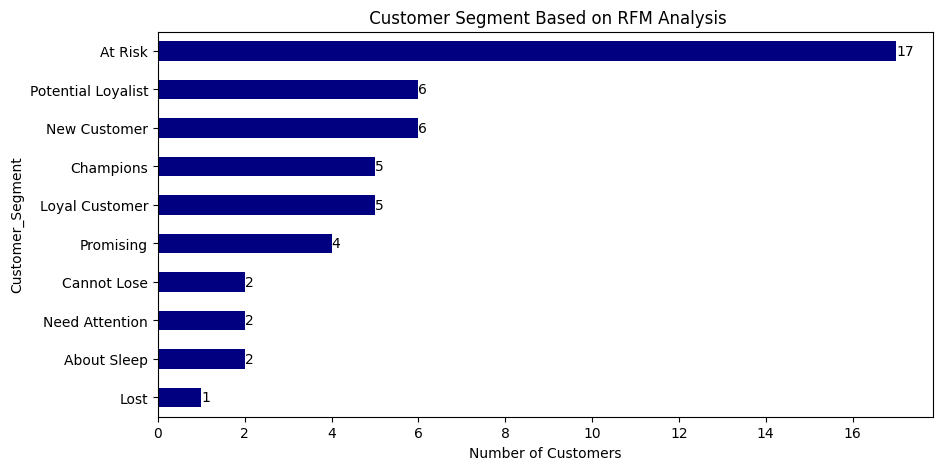

In [ ]:
ax = rfm.groupby("Customer_Segment")['_CustomerID'].count().sort_values(ascending=True)\
    .plot(kind='barh', figsize=(10,5), title = ' Customer Segment Based on RFM Analysis', color="navy")
ax.set_xlabel('Number of Customers')
ax.set_facecolor("white")
ax.bar_label(ax.containers[0], color = "black")
plt.show()

In [ ]:
# Average RFM values for reach Customer Segment

CustSeg_summary=rfm.groupby("Customer_Segment")[["recency","frequency","monetary"]].mean()

CustSeg_summary

,recency,frequency,monetary
Customer_Segment,,,
About Sleep,8.000000,152.000000,345047.470750
At Risk,10.705882,157.470588,410933.762265
Cannot Lose,13.500000,170.000000,473100.483750
Champions,3.000000,178.800000,508542.602700
Lost,23.000000,151.000000,352505.525500
Loyal Customer,5.600000,173.600000,492372.487700
Need Attention,4.000000,165.000000,441687.835250
New Customer,3.833333,142.666667,378396.385750
Potential Loyalist,3.166667,160.666667,415474.113167


**Interpreting Customer Segments**

1. **Champions**: Recent purchase, buy often, spend a lot. **Strategy**: Reward them
2.  **Loyal**: Buy frequently, spend a lot. **Strategy**: Offer high value items
3. **Potential Loyalist**: Spent fair amount. **Strategy**: Invite to loyalty program.
4.  **New Customer**: Recent purchase. **Strateg**y:  Build loyalty.
5.  **Promising**: Recent purchase, did not spend a lot. **Strategy**: Offer discounts, gifts, trials.
6. **Need Attention**: Above average R, F, M. No recent purchase. **Strategy**: Launch limited-time offers
7.  **Cannot Lose**: Hugh frequent purchase a while ago. **Strategy**: New product launches
8.  **About Sleep**: Below average R, F, M. **Strategy**: Recommend products. Offer discounts.
9. **At Risk**: Big frequent purchases long ago. **Strategy**: Personalized emails. Special offers.
10.**Hibernating**: Last purchase long ago. **Strategy**: Offer relevant products and special discounts.
11. **Lost**: Lowest scores. **Strategy**: Reactivate with special campaigns.


|


In [ ]:
# Write rfm dataframe to CSV file

rfm.to_csv("/content/rfm.csv",index=False)